In [1]:
#Import libraries and read CSVs

import pandas as pd
import sqlite3

letter_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Letter_Table.csv")
recipient_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Recipient_Table.csv")
carrier_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Carrier_Table.csv")
translation_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Translation_Table.csv")
type_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Type_Table.csv")
destination_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Destination_Table.csv")
mapping_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Mapping_Table(Letter+Type).csv")
pleiades = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Pleiades/pleiades-places.csv")

#Load the database connection into memory

conn = sqlite3.connect(':memory:')

#Load the dataframes into sql

letter_table.to_sql('letter_table',conn,if_exists="replace")
recipient_table.to_sql('recipient_table', conn, if_exists="replace")
carrier_table.to_sql('carrier_table', conn, if_exists="replace")
translation_table.to_sql('translation_table', conn, if_exists="replace")
type_table.to_sql('type_table', conn, if_exists="replace")
destination_table.to_sql('destination_table', conn, if_exists="replace")
mapping_table.to_sql('mapping_table', conn, if_exists="replace")
pleiades.to_sql('pleiades', conn, if_exists="replace")

# Creating the Dataset from the Database

In [2]:
#I join the tables letter_table, destination_table and pleiades to create a table
#that contains the geographical information for each destination

pd.read_sql("""
SELECT letter_table.Letter_ID, destination_table.Destination_ID, pleiades.reprLat, pleiades.reprLong
FROM letter_table, destination_table, pleiades
WHERE (letter_table.Destination_ID = destination_table.Destination_ID)
    AND (destination_table.Pleiades_ID = pleiades.id)
ORDER BY letter_table.Letter_ID
""", conn)

,Letter_ID,Destination_ID,reprLat,reprLong
0,75,Constantinople,41.007463,28.960610
1,83,Constantinople,41.007463,28.960610
2,95,Euphratensis,37.500000,37.500000
3,119,Phoenicia,33.250000,35.250000
4,142,Euphratensis,37.500000,37.500000
5,156,Phoenicia,33.250000,35.250000
6,158,Palestina Prima,31.250000,34.750000
7,159,Phoenicia,33.250000,35.250000
8,166,Phoenicia,33.250000,35.250000
9,175,Phoenicia,33.250000,35.250000


In [3]:
#I create a dataframe out of that new table

destinations = pd.read_sql("""
SELECT letter_table.Letter_ID, destination_table.Destination_ID, pleiades.reprLat, pleiades.reprLong
FROM letter_table, destination_table, pleiades
WHERE (letter_table.Destination_ID = destination_table.Destination_ID)
    AND (destination_table.Pleiades_ID = pleiades.id)
ORDER BY destination_table.Destination_ID
""", conn)

destinations['Total'] = destinations.groupby(['Destination_ID'])['Destination_ID'].transform('count')

print(destinations)

    Letter_ID   Destination_ID    reprLat   reprLong  Total
0        1230       Alexandria  31.198246  29.907915      1
1        1357           Apamea  35.491242  36.401566      1
2         763           Arabia  30.328611  35.441944      1
3         656          Armenia  39.500000  40.500000      1
4         458         Bithynia  41.019724  31.501635      2
5         459         Bithynia  41.019724  31.501635      2
6        1174       Cappadocia  39.250000  35.750000      4
7        1222       Cappadocia  39.250000  35.750000      4
8        1223       Cappadocia  39.250000  35.750000      4
9        1514       Cappadocia  39.250000  35.750000      4
10       1411          Cilicia  36.250000  33.250000      4
11        715          Cilicia  36.250000  33.250000      4
12        735          Cilicia  36.250000  33.250000      4
13        697          Cilicia  36.250000  33.250000      4
14        399   Constantinople  41.007463  28.960610      4
15        560   Constantinople  41.00746

# Mapping the Letters

In [4]:
#Makes sure that the maps are displayed correctly in the same page

from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = (8,6)

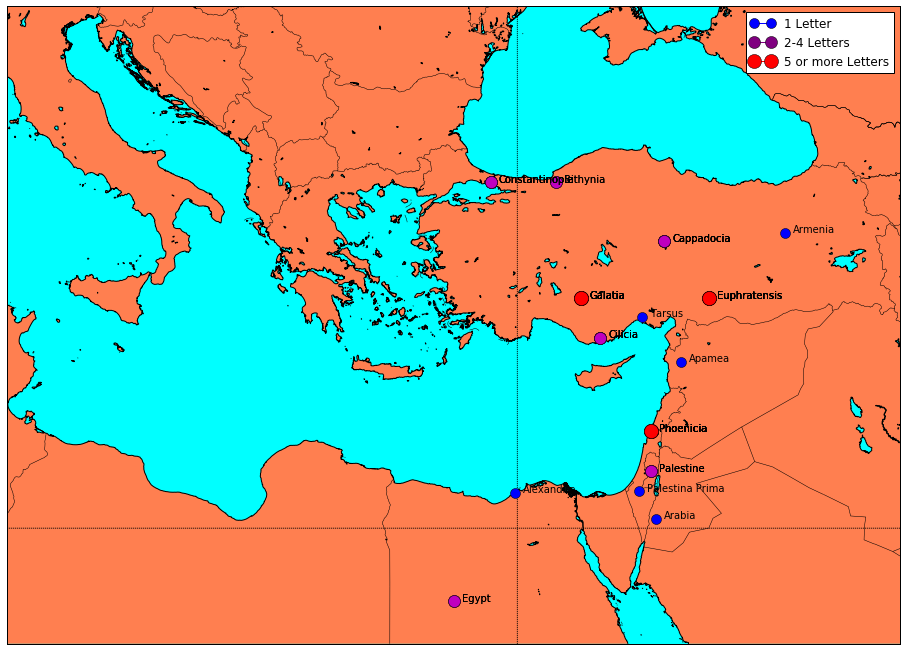

In [5]:
#How to make a map from a pandas dataframe

from mpl_toolkits.basemap import Basemap
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
 
plt.figure(figsize=(16,12))
    
libanius_letters = Basemap(projection='merc', lat_0=36, lon_0=30,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=10, llcrnrlat=26,
    urcrnrlon=45, urcrnrlat=46)

 
libanius_letters.drawcoastlines()
libanius_letters.drawcountries()
libanius_letters.fillcontinents(color='coral', lake_color='aqua')
libanius_letters.drawmapboundary(fill_color='aqua')

libanius_letters.drawmeridians(np.arange(0, 360, 30))
libanius_letters.drawparallels(np.arange(-90, 90, 30))

x,y = libanius_letters(destinations['reprLong'].values, destinations['reprLat'].values)

labels = destinations['Destination_ID']

for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt+35000, ypt, label)

frequencies = destinations['Total']

for f, x, y in zip(frequencies, x, y):
    if f > 0 and f < 2:
        libanius_letters.plot(x, y, marker='o',color='b', markersize=10)
    elif f >= 2 and f < 5:
        libanius_letters.plot(x, y, marker='o',color='m', markersize=12)
    else:
        libanius_letters.plot(x, y, marker='o',color='r', markersize=14)

        
blue_line = mlines.Line2D([], [], color='blue', marker='o', markersize=10, label='1 Letter')
purple_line = mlines.Line2D([], [], color='purple', marker='o', markersize=12, label='2-4 Letters')
red_line = mlines.Line2D([], [], color='red', marker='o', markersize=14, label='5 or more Letters')
plt.legend(handles=[blue_line, purple_line, red_line])

plt.show()

How to create the same map directly from a csv file

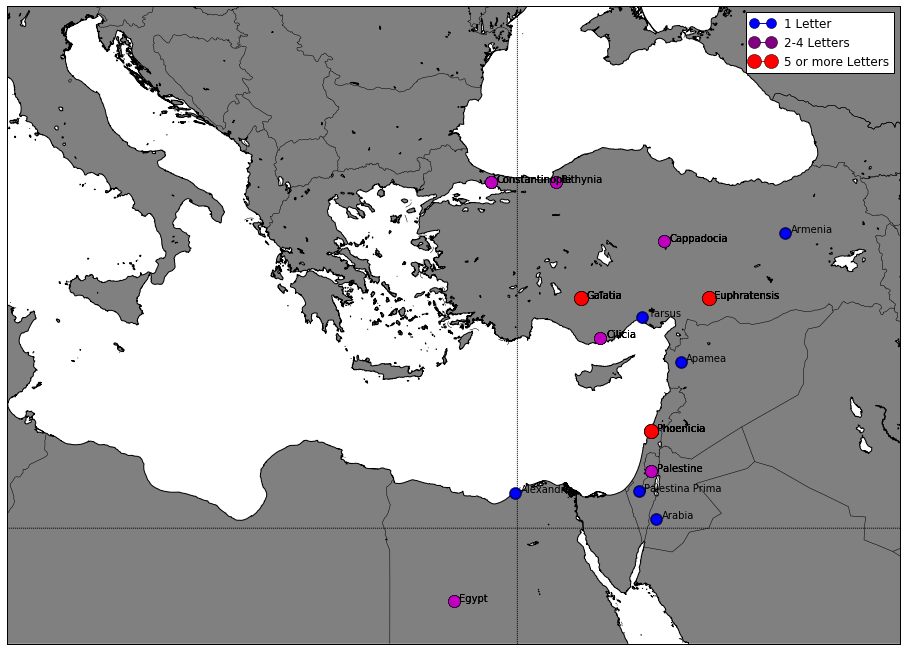

In [7]:
#We first need to create a csv file from the dataframe

destinations.to_csv('destinations.csv')

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import csv

#Then we create the map(this section remains unchanged)
 
plt.figure(figsize=(16,12))
    
libanius_letters = Basemap(projection='merc', lat_0=36, lon_0=30,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=10, llcrnrlat=26,
    urcrnrlon=45, urcrnrlat=46)

 
libanius_letters.drawcoastlines()
libanius_letters.drawcountries()
libanius_letters.fillcontinents(color='gray')
libanius_letters.drawmapboundary()

libanius_letters.drawmeridians(np.arange(0, 360, 30))
libanius_letters.drawparallels(np.arange(-90, 90, 30))

#We then extract the information from the file and put it into empty lists

file = 'destinations.csv'

lats, lons = [], []

with open(file) as f:
    reader = csv.reader(f)
    
    next(reader) #this makes it so that we skip the first line/header
    
    for row in reader:
        lats.append(float(row[3]))
        lons.append(float(row[4]))
        
labels = []

with open(file) as f:
    reader = csv.reader(f)
    
    next(reader)
    
    for row in reader:
        labels.append(row[2])

x,y = libanius_letters(lons, lats)
libanius_letters.plot(x, y, 'bo', markersize=12)


for label, xpt, ypt in zip(labels, x, y): #zip function makes an iterator that aggregates elements from each of the iterables
    plt.text(xpt+25000, ypt, label) #The offset is necessary to make the labels more clearly visible
    
frequencies = []

with open(file) as f:
    reader = csv.reader(f)
    
    next(reader)
    
    for row in reader:
        frequencies.append(float(row[5]))
    
for f, x, y in zip(frequencies, x, y):
    if f > 0 and f < 2:
        libanius_letters.plot(x, y, marker='o',color='b', markersize=10)
    elif f >= 2 and f < 5:
        libanius_letters.plot(x, y, marker='o',color='m', markersize=12)
    else:
        libanius_letters.plot(x, y, marker='o',color='r', markersize=14)
        
#We create a legend for the different categories
        
blue_line = mlines.Line2D([], [], color='blue', marker='o', markersize=10, label='1 Letter')
purple_line = mlines.Line2D([], [], color='purple', marker='o', markersize=12, label='2-4 Letters')
red_line = mlines.Line2D([], [], color='red', marker='o', markersize=14, label='5 or more Letters')
plt.legend(handles=[blue_line, purple_line, red_line])
 
plt.show()